In [103]:
import pandas as pd
import geopandas as gp
import shapely as sp
from shapely.geometry import Point, Polygon, MultiPolygon
import numpy as np

In [104]:
polygon = Polygon([(1,0),(3,0),(3,2),(1,2)])
polygon.area

4.0

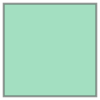

In [105]:
polygon

In [106]:
polygon.bounds

(1.0, 0.0, 3.0, 2.0)

In [107]:
poly2 = Polygon([(1,1),(2,1),(2,3),(1,3)])

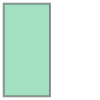

In [108]:
poly2

In [109]:
comb1 = MultiPolygon([polygon, poly2])

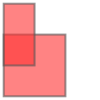

In [110]:
comb1

In [111]:
comb1.area

6.0

In [112]:
print(comb1.area)
print(poly2.area)
print(polygon.area)

6.0
2.0
4.0


In [113]:
x = polygon.intersection(poly2)

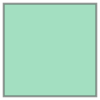

In [114]:
x

In [115]:
x.area

1.0

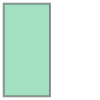

In [116]:
poly3 = Polygon([(4,1),(4,3),(5,3),(5,1)])
poly3

In [117]:
y = polygon.intersection(poly2).intersection(poly3)

In [118]:
y.area

0.0

can clearly string .intersections together, but what about with the comb1, multipolygon class.  Can we find the intersection within that?

In [119]:
comb1.intersection()

TypeError: intersection() missing 1 required positional argument: 'other'

So I'm going to have to do the following: (assuming we can't find intersection from multipoly directly, still need to look into)

Create the hirise image shapes as polygons 

Store all of them as a multipoly, by region

Within each region (and thus within each multipoly) go through and try every combination of intersecting and store the areas.  Maybe not all areas? Maybe all?  Need to maximize both the areas from the intersections and the number of the polygons (which means the maximum number of hirise images)
The above will be hard to decide before actually doing it, seeing how the overlapping areas and number of things included work out.  Maybe have it spit out the maximum number of polygons used that still have a positive area as well as the maximum area (with its associated number of polygons used), maybe top 15?  So it spits out the highest 15 areas as well as the associated number of polygons making those up?  Top 15 if there are a lot of hirise images, some regions have only 2!  maybe 15 is too much but might be a good jumping off point.  Figure out maximum number of hirise images in a region then come back to this to decide.

Naw above is too much, instead use cascaded union and combination pairs! See below link for further details:
https://gis.stackexchange.com/questions/11987/polygon-overlay-with-shapely/11990#11990

Lets create a bigger set of artifical polygons, maybe 10 of them, then mess around with optimizing.

In [120]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [121]:
np.random.random([])*100

20.501228079104028

In [122]:
#this creates 10 random polygons
polybucket = []
for i in np.arange(10):
    x = np.random.random([])*100
    x2 = np.random.random([])*200
    while x2 < x:
        x2 = np.random.random([])*200
    y = np.random.random([])*100
    y2 = np.random.random([])*200
    while y2 < y:
        y2 = np.random.random([])*200
    randpoly = Polygon([(x,y),(x2,y),(x2,y2),(x,y2)])
    polybucket.append(randpoly)

How to make a multipoly from the polygons within polybucket?

In [123]:
from shapely.ops import cascaded_union
from itertools import combinations

In [124]:
len(polybucket)

10

In [125]:
np.arange(len(polybucket)+1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [126]:
#ignore the multipoly for now, just use polybucket
for i in np.arange(len(polybucket)+1):
    combos = combinations(polybucket, i)  #these lines give every poss. combo.
for comb in combos:
    inter = cascaded_union([comb]) 
#need to do every intersection somehow
#like comb[0].intersection(comb[1]).intersection... .intersection(comb[-1])
    
    
#cascaded union sueprceded by unary union nowadays


AttributeError: 'tuple' object has no attribute '_geom'

In [127]:
from shapely.ops import polygonize, unary_union

In [128]:
#for n = 3
polybox = ([polygon, poly2, poly3])

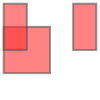

In [129]:
polyboxshape = MultiPolygon([polygon, poly2, poly3])
polyboxshape

In [130]:
polybox

In [131]:
#inter = cascaded_union([pair[0].intersection(pair[1]) for pair in combinations(shapes, 2)])
inter = cascaded_union([combo[0].intersection(combo[1]) for combo in combinations(polybox, 2)])

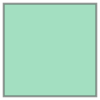

In [132]:
inter

In [133]:
inter.area

1.0

In [134]:
inter2 = cascaded_union([combo[0].intersection(combo[1]).intersection(combo[2]) for combo in combinations(polybox, 3)])

In [135]:
inter2

In [136]:
#seems to work right, need more illustrative example with multiple overlaps
#see best way to pick out the largest, add another polygon with overlap of area 1 and overlap of area 2

In [137]:
poly4 = Polygon([(1,1),(5,1),(5,2),(1,2)])

In [138]:
polybox2 = [polygon, poly2, poly3, poly4]

In [139]:
polybox2

In [140]:
polybox2shape = MultiPolygon([polygon, poly2, poly3, poly4])

In [141]:
polybox2shape.area

12.0

In [142]:
polybox2shape.intersection()

TypeError: intersection() missing 1 required positional argument: 'other'

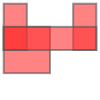

In [143]:
polybox2shape

In [144]:
inter3 = cascaded_union([combo[0].intersection(combo[1]).intersection(combo[2]).intersection(combo[3]) for combo in combinations(polybox2, 4)])

In [145]:
inter3 
#no results because combinations(polybox2, 4) needs all 4 in it

In [45]:
arr = [1,2,3,4]
r = 3
this = np.asarray(list(combinations(arr, r)))
this

array([[1, 2, 3],
       [1, 2, 4],
       [1, 3, 4],
       [2, 3, 4]])

In [46]:
this

array([[1, 2, 3],
       [1, 2, 4],
       [1, 3, 4],
       [2, 3, 4]])

In [47]:
print(this[0])
print(this[0][0])

[1 2 3]
1


In [48]:
#lets test on polybox2
x1 = list(combinations(polybox, 1))
x1

[(<shapely.geometry.polygon.Polygon at 0x15eb44a4f98>,),
 (<shapely.geometry.polygon.Polygon at 0x15eb44af400>,),
 (<shapely.geometry.polygon.Polygon at 0x15eb44c5048>,)]

In [49]:
type(x1[0])
x1[0]

(<shapely.geometry.polygon.Polygon at 0x15eb44a4f98>,)

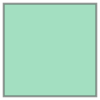

In [50]:
polybox2[0]

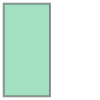

In [51]:
polybox2[1]

In [52]:
import functools

In [61]:
print(functools.reduce(sp.intersection,polybox2))
#if we get this to work, we're done, just add dictionary output.
#Otherwise close on whiteboard brute force with combinatorics

AttributeError: module 'shapely' has no attribute 'intersection'

In [278]:
#do what we discussed
polybox2 = [polygon, poly2, poly3, poly4]
iterable = range(len(polybox2))
r = len(polybox2)
for n in iterable:
    if r > 0:
        print(r)
        comb = list(combinations(iterable,r))
        print(comb)  #literally a list object
        for item in comb:
            print(item)
            #print(len(comb[num]))
            x = item
        #y = MultiPolygon[]
            #for ele in x:
            #want like ele[0].intersection... .intersection(ele[-1])
            
        r = r-1
    else: 
        end

4
[(0, 1, 2, 3)]
(0, 1, 2, 3)
3
[(0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3)]
(0, 1, 2)
(0, 1, 3)
(0, 2, 3)
(1, 2, 3)
2
[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
(0, 1)
(0, 2)
(0, 3)
(1, 2)
(1, 3)
(2, 3)
1
[(0,), (1,), (2,), (3,)]
(0,)
(1,)
(2,)
(3,)


In [273]:
polyboxshape.append(polybox[0])

AttributeError: 'MultiPolygon' object has no attribute 'append'

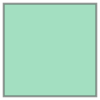

In [260]:
polybox[0]

In [244]:
y = [(0, 1, 2, 3)]

In [247]:
print(y[0])
print(y[0][0])

(0, 1, 2, 3)
0


In [288]:
print(comb)
print(len(comb))

[(0,), (1,), (2,), (3,)]
4


In [262]:
len(y)

1

In [289]:
#import dask

below is testing geopandas stuff

In [2]:
#testing geopandas stuff
from shapely.geometry import Polygon

In [89]:
polys1 = gp.GeoSeries(
    [
        Polygon([(0,0), (2,0), (2,2), (0,2)]),
        #Polygon([(2,2), (4,2), (4,4), (2,4)])
    ])
polys2 = gp.GeoSeries(
    [
    #    Polygon([(1,1), (3,1), (3,3), (1,3)]),
        Polygon([(3,3), (5,3), (5,5), (3,5)])
    ])

In [90]:
polys1

0    POLYGON ((0 0, 2 0, 2 2, 0 2, 0 0))
dtype: object

In [72]:
gp.GeoDataFrame?

In [68]:
df1 = gp.GeoDataFrame({'geometry': polys1, 'df1':[1,2]})

In [158]:
df1 = gp.GeoDataFrame({'geometry': polys1})

In [159]:
df1

,geometry
0,"POLYGON ((0 0, 2 0, 2 2, 0 2, 0 0))"


In [77]:
df2 = gp.GeoDataFrame({'geometry': polys2, 'df2':[5,3]})

In [93]:
df2 = gp.GeoDataFrame({'geometry': polys2})

In [94]:
df2

,geometry
0,"POLYGON ((3 3, 5 3, 5 5, 3 5, 3 3))"


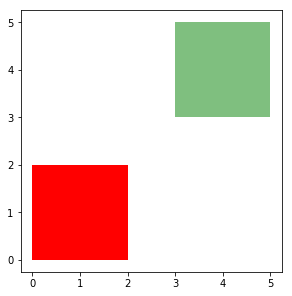

In [95]:
ax = df1.plot(color = 'red');
df2.plot(ax = ax, color = 'green', alpha = 0.5)

In [166]:
try:
    res_inter = None
    res_inter = gp.overlay(df1, df2, how='intersection')
except KeyError:
    pass
else:
    print(res_inter)

In [167]:
res_inter.geometry[0].area
#go through each of these geometries and sum the areas
#pandas has a way to do this easily with a dataframe, remember how
#recreate the dataframe with the way michael wanted, that is
#with taking the bounds instead of the way I did it. see his text.

AttributeError: 'NoneType' object has no attribute 'geometry'

In [43]:
res_inter.geometry.area.sum()

1.0

That works fine, so now I just need to recreate the dataframe of polygons the way that michael wants them.  Once that's recreated I group by area, make a loop to go through by area creating these dataframes for each and then taking intersection, have a dictionary report the area.sum() and the region, as well as how many polygons make it up (and therefore how many hirise images which indicates the spread of time).  

Oh wait, it doesnt work fine.  Lets test out the try and except stuff with my red polygon from before, as it has the possible cases included.  Try it overlaid with itself as well.  Have exception not pass, but instead return an area of zero.

In [150]:
polybox2 = [polygon, poly2, poly3, poly4]

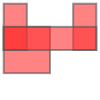

In [157]:
polybox2shape

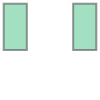

In [182]:
polybox2shape[1:3]

In [162]:
t1 = gp.GeoDataFrame({'geometry': gp.GeoSeries(polygon)})
t2 = gp.GeoDataFrame({'geometry': gp.GeoSeries(poly2)})
t3 = gp.GeoDataFrame({'geometry': gp.GeoSeries(poly3)})
t4 = gp.GeoDataFrame({'geometry': gp.GeoSeries(poly4)})

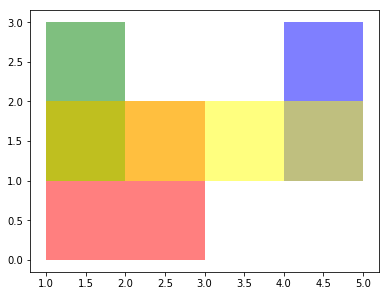

In [163]:
ax = t1.plot(color = 'red', alpha = 0.5);
t2.plot(ax = ax, color = 'green', alpha = 0.5);
t3.plot(ax = ax, color = 'blue', alpha = 0.5);
t4.plot(ax = ax, color = 'yellow', alpha = 0.5)

In [172]:
try:
    res_inter = None
    res_inter = gp.overlay(df1, df2, how='intersection')
except KeyError:
    #pass
    print(2)
else:
    print(1)

2


In [170]:
try:print

In [198]:
polygon.area #polygon is t1, so intersecting it with itself seems correct.

4.0

In [194]:
#res_union = gp.overlay(t1, t2, t3, t4, how = 'intersection')
#above not allowed, have to go pair by pair. Ew.
try:
    res_inter = gp.overlay(t1, t1, how = 'intersection')
except KeyError:
    pass
else:
    print(res_inter.geometry.area)

0    4.0
dtype: float64


In [200]:
#so it seems to work fine for intersecting with itself here.

In [190]:
res_inter

,geometry
0,"POLYGON ((1 1, 1 2, 2 2, 2 1, 1 1))"


above moves on when there is a problem with intersection, seems to be exactly what we want- is there any case other than there being no intersection for which a key error is raised?  Can be problematic and idk how to figure out.  also now need to go through each and every combination in gp.overlay(df1, df2) pairs.  Can only be pairs, problematic as we often have way more than 2 in a region.  How to fix?

Fix by writing a loop that for a region, creates an object for the intersection of two, call it x, then does the intersection between x and the third, call that y, then the intersection between y and the 4th, call that... etc etc until all combinations are done.  

Actually gp.overlay(df1, df2, how = 'intersection') can accept multipolygons meaning that we use my loop earlier to go through each bit with combinatorics, find the possible combinations, then have to use those results to create a multipolygon and take the intersection with itself.  to get the area! 

In [205]:
#polybox2shape is the multipolygon of polybox2
#want to try overlaying the multipolygon with itself

pb2 = gp.GeoDataFrame({'geometry': gp.GeoSeries(polybox2shape)})
try:
    res_inter = gp.overlay(pb2, pb2, how = 'intersection')
except KeyError:
    pass
else:
    print(res_inter.geometry.area)

0    8.0
dtype: float64


In [207]:
polybox2shape.area

12.0

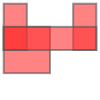

In [208]:
polybox2shape

In [210]:
pb2.area

0    12.0
dtype: float64